In [106]:
# Dependencies
import numpy as np
import pandas as pd
import pylab as pb
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import gmaps
from config import g_key

url = "https://api.worldbank.org/v2/country/all/indicator/IC.BUS.EASE.DFRN.XQ.DB1719?per_page=400&date=2015:2018&format=json"


# using CSV file Mary saved in Github 
dfcoord = pd.read_csv(r'C:\Users\omar.aziz\Desktop\Rice Data Analytics\kiva_mpi_region_locations.csv')

In [107]:
response = requests.get(url)
raw_data = response.json()
countries = raw_data[1][0]['country']['value']
print(countries)

Beijing


In [108]:
# Report the names
countries = []
doingbusiness_score =[]
countrycode = []


for i in range(len(raw_data[1])):
    countries.append(raw_data[1][i]['country']['value'])
    doingbusiness_score.append(raw_data[1][i]['value'])
    countrycode.append(raw_data[1][i]['country']['id'])

In [109]:
df = pd.DataFrame(raw_data[1])
df.columns

Index(['country', 'countryiso3code', 'date', 'decimal', 'indicator',
       'obs_status', 'unit', 'value'],
      dtype='object')

In [110]:
df.head()

,country,countryiso3code,date,decimal,indicator,obs_status,unit,value
0,"{'id': 'CN-BJ', 'value': 'Beijing'}",,2018,1,"{'id': 'IC.BUS.EASE.DFRN.XQ.DB1719', 'value': ...",,,64.99
1,"{'id': 'CN-BJ', 'value': 'Beijing'}",,2017,1,"{'id': 'IC.BUS.EASE.DFRN.XQ.DB1719', 'value': ...",,,64.53
2,"{'id': 'CN-BJ', 'value': 'Beijing'}",,2016,1,"{'id': 'IC.BUS.EASE.DFRN.XQ.DB1719', 'value': ...",,,62.87
3,"{'id': 'CN-BJ', 'value': 'Beijing'}",,2015,1,"{'id': 'IC.BUS.EASE.DFRN.XQ.DB1719', 'value': ...",,,NaN
4,"{'id': 'BD-CG', 'value': 'Chittagong'}",,2018,1,"{'id': 'IC.BUS.EASE.DFRN.XQ.DB1719', 'value': ...",,,41.77


In [111]:
df1 = pd.DataFrame({'Cities/Countries':countries,'CountryCode':countrycode,'AvgScore':doingbusiness_score})
df1.head()

,Cities/Countries,CountryCode,AvgScore
0,Beijing,CN-BJ,64.99
1,Beijing,CN-BJ,64.53
2,Beijing,CN-BJ,62.87
3,Beijing,CN-BJ,NaN
4,Chittagong,BD-CG,41.77


In [112]:
df2 = df1.groupby('Cities/Countries')['AvgScore'].mean()
df2.head(5)

Cities/Countries
Afghanistan            38.443333
Albania                65.560000
Algeria                46.983333
Angola                 40.743333
Antigua and Barbuda    58.906667
Name: AvgScore, dtype: float64

In [113]:
df3 = pd.DataFrame(df2)
df3.head()

,AvgScore
Cities/Countries,
Afghanistan,38.443333
Albania,65.560000
Algeria,46.983333
Angola,40.743333
Antigua and Barbuda,58.906667


In [114]:
df4 = df3.sort_values(by='AvgScore', ascending=True)
df5 = df4.drop(df4[df4.AvgScore > 75].index)
len(df)
df5.head(5)

,AvgScore
Cities/Countries,
Eritrea,22.646667
Central African Republic,33.730000
"Congo, Dem. Rep.",36.050000
Chad,38.193333
Haiti,38.383333


In [115]:
df6 = df5.drop(df5[df5.AvgScore > 75].index)
len(df6)

df6.head(5)

,AvgScore
Cities/Countries,
Eritrea,22.646667
Central African Republic,33.730000
"Congo, Dem. Rep.",36.050000
Chad,38.193333
Haiti,38.383333


In [116]:
dfcoord.columns = ['Location Name', 'ISO', 'Cities/Countries', 'Region', 'World Region', 'MPI', 'Geo', 'Lat', 'Lng']
dfcoord.head()

,Location Name,ISO,Cities/Countries,Region,World Region,MPI,Geo,Lat,Lng
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [117]:
merge_table = pd.merge(dfcoord,df6, on='Cities/Countries')
merge_table = merge_table[np.isfinite(merge_table['Lat'])]

merge_table.head(5)


,Location Name,ISO,Cities/Countries,Region,World Region,MPI,Geo,Lat,Lng,AvgScore
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995,38.443333
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538,38.443333
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754,38.443333
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537,38.443333
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210,38.443333


In [118]:
merge_table2 = merge_table.groupby('Cities/Countries')['AvgScore','Lat','Lng','MPI'].mean()

In [119]:
merge_table3 = merge_table2.sort_values(by='AvgScore', ascending=True)
merge_table3.head(100)

,AvgScore,Lat,Lng,MPI
Cities/Countries,,,,
Central African Republic,33.730000,6.943445,18.198751,0.444750
Chad,38.193333,10.197954,18.000479,0.587059
Haiti,38.383333,20.019872,-54.585876,0.308444
Afghanistan,38.443333,33.779918,68.768751,0.309853
Bangladesh,40.663333,23.816921,90.267463,0.208286
Guinea-Bissau,41.713333,11.902494,-15.204851,0.438375
Cameroon,44.926667,5.258436,11.381439,0.187667
Gabon,45.270000,-0.656059,9.993813,0.082333
Burundi,46.600000,2.702264,43.536964,0.411800


In [120]:
locations = merge_table3[["Lat","Lng"]]
avgscore = merge_table3["AvgScore"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=avgscore, dissipating=False, max_intensity=10, point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

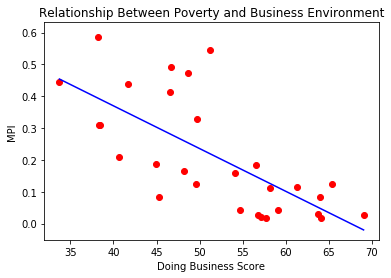

In [121]:
x = merge_table3['AvgScore']
y = merge_table3['MPI']

plt.title("Relationship Between Poverty and Business Environment")
plt.xlabel("Doing Business Score")
plt.ylabel("MPI")
plt.scatter(x,y, marker="o", color="red")

z = np.polyfit(x,y,1)
p = np.poly1d(z)
pb.plot(x,p(x),"blue")


In [122]:
# There seems to be a direct relationship between poverty and business environment. As the business environment improves within a country, poverty is alleviated.
# Blue trendline demonstrates this relationship.